In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('data/Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.count().duplicated()

Email                   False
Address                  True
Avatar                   True
Avg. Session Length      True
Time on App              True
Time on Website          True
Length of Membership     True
Yearly Amount Spent      True
dtype: bool

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


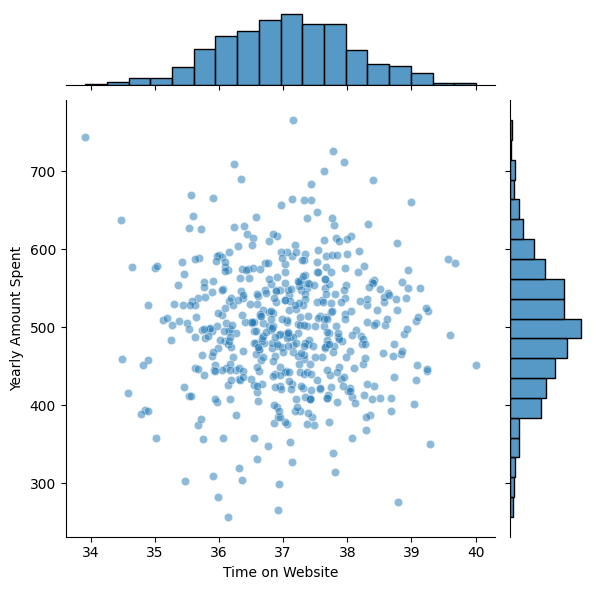

In [7]:
#eda
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df, alpha=0.5)

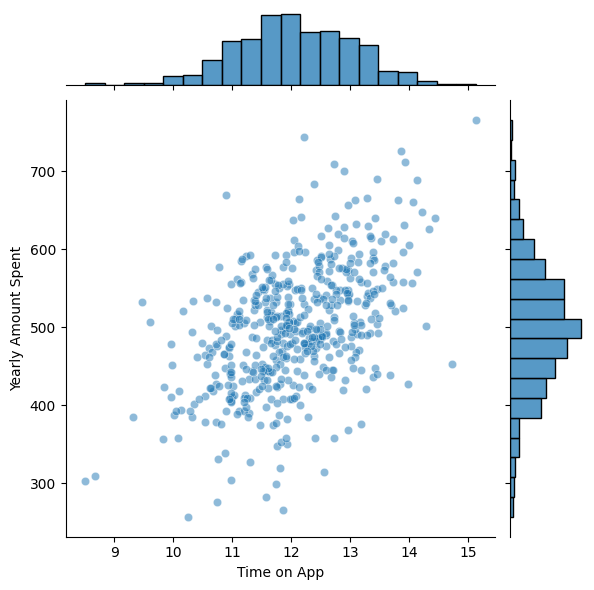

In [8]:
#eda
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df, alpha=0.5)

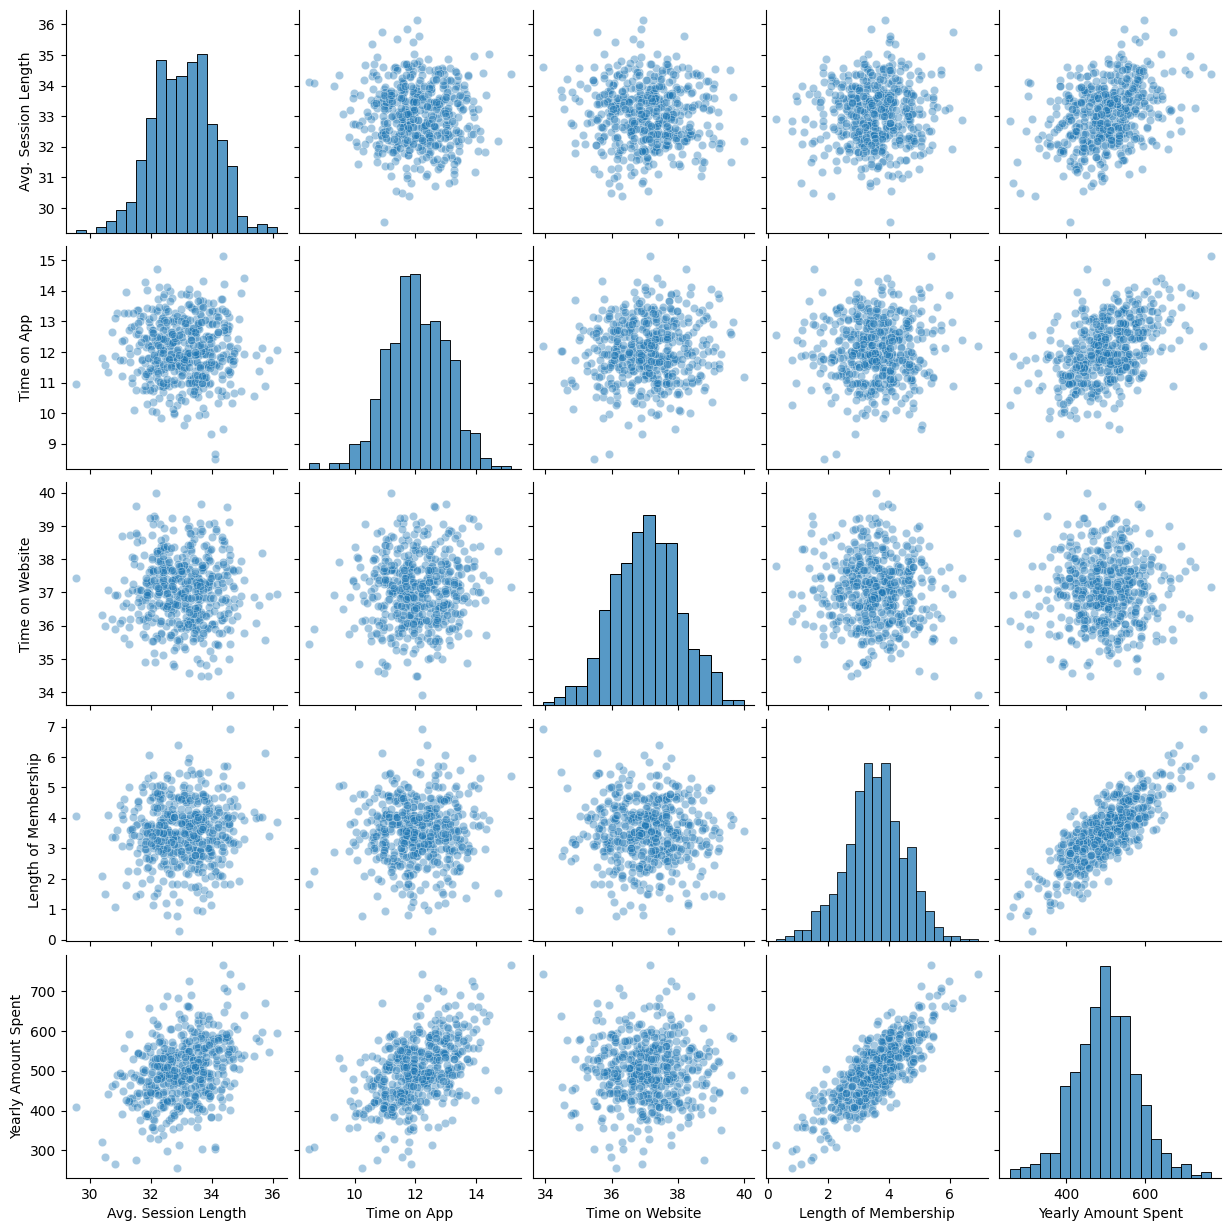

In [9]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.4})             

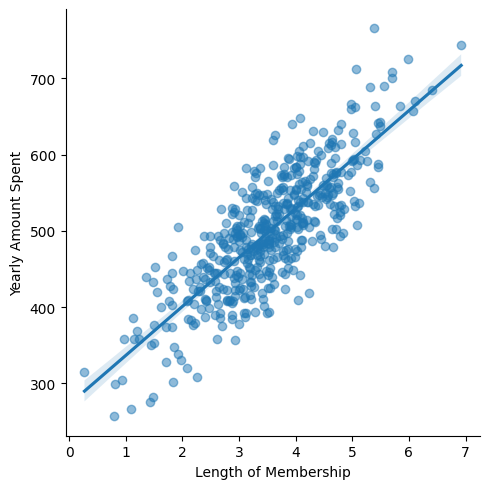

In [10]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df,scatter_kws={'alpha':0.5})

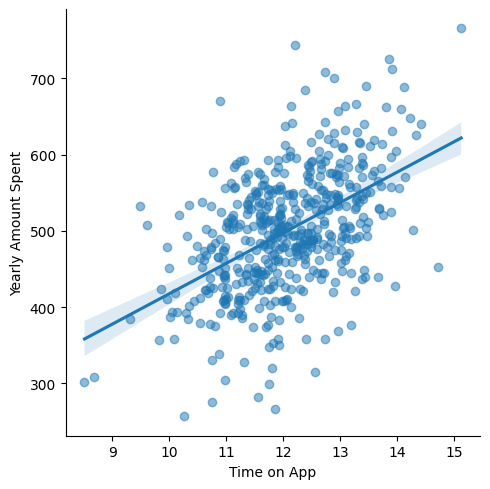

In [11]:
sns.lmplot(x='Time on App',y='Yearly Amount Spent',data=df,scatter_kws={'alpha':0.5})

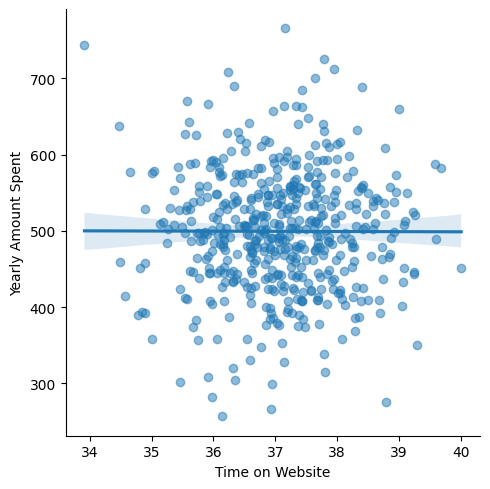

In [12]:
sns.lmplot(x='Time on Website',y='Yearly Amount Spent',data=df,scatter_kws={'alpha':0.5})

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X= df[['Avg. Session Length', 'Time on App' , 'Time on Website', 'Length of Membership']]

y=df['Yearly Amount Spent']


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
#train
from sklearn.linear_model import LinearRegression

In [17]:
lm=LinearRegression()

In [18]:
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [20]:
prediction=lm.predict(X_test)

In [21]:
prediction

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0.5, 1.0, 'ecal of lr model')

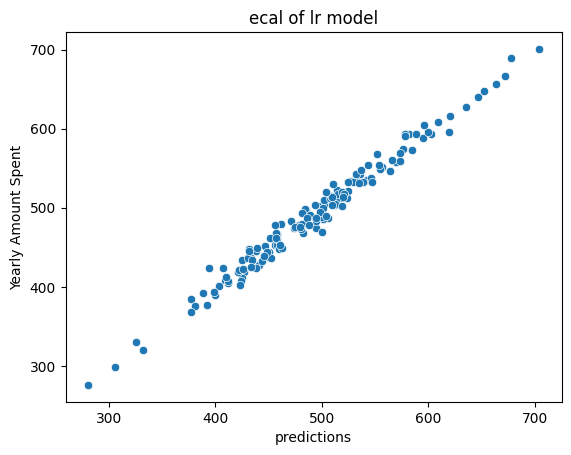

In [22]:
sns.scatterplot(x=prediction,y=y_test)
plt.xlabel('predictions')
plt.title('ecal of lr model')

In [23]:
#evalutaing metrics--
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

In [24]:
print('mean_absolute_error',mean_absolute_error(y_test,prediction))
print('mean_squared_error',mean_squared_error(y_test,prediction))
print('RMSE',math.sqrt(mean_squared_error(y_test,prediction)))

mean_absolute_error 8.426091641432068
mean_squared_error 103.9155413650325
RMSE 10.193897260863114


In [25]:
#residuals
residuals=y_test-prediction

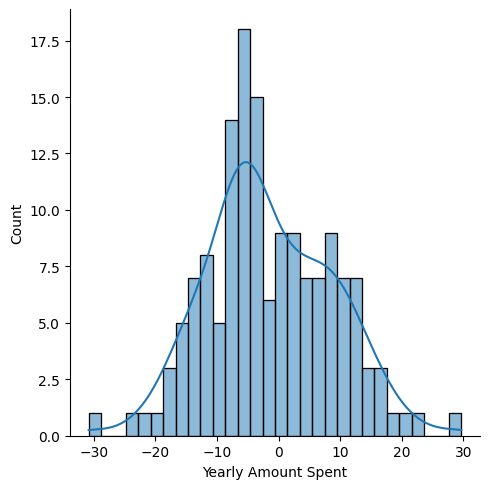

In [26]:
sns.displot(residuals,bins=30,kde=True)

In [27]:
import pylab
import scipy.stats as stats

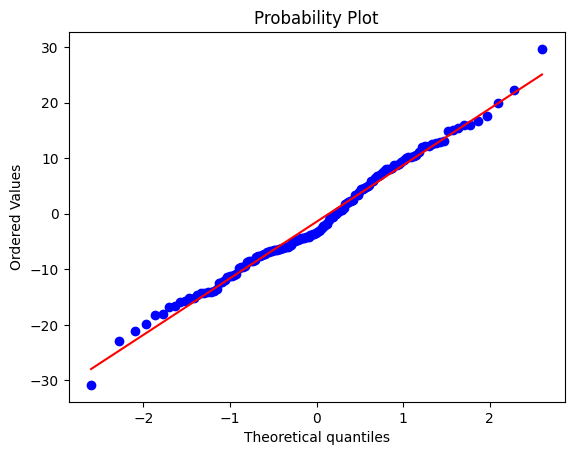

In [28]:
stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()

In [29]:
import pickle
with open("lm.pkl","wb") as f:
    pickle.dump(lm,f)